# STEP BY STEP BEGINEERS GIUDE FOR DATA ANALYSIS OF AVIATION ACCIDENTS DATA by SWAPNIL GHARAT 

This code contains some basic intructions for extreme begineers
Note:Extreme begineers please read the instructions carefully I have added some baic examples of the functions

Note: Pros please neglect the isntructions and suggest any improvements

In [1]:
##Importing the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn.cluster import KMeans

Importing data
Select your own path from your database.


Note: Some of you might get this Error ('utf-8' codec can't decode byte 0xd3 in position 8: invalid continuation byte)

Solution: add, engine='python' after the path


In [2]:
train=pd.read_csv('/Users/swapnilgharat/Desktop/KAGGLE PROJECTS/CONSOLE GAMES/Aviation Dataset/AviationData.csv', engine='python')

Take a sneak peak at the data, understanding the data.

In [3]:
train.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,Positioning,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,Personal,NaN,NaN,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18


In [4]:
train.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
82630,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,1980-04-16
82631,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,2000-09-12
82632,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,2007-02-26
82633,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,1996-09-19
82634,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,CRUISE,Probable Cause,NaN


Check data types of each columns

In [5]:
train.dtypes
##you can observe that Event.Date is not in the right format,hence we need to convert it to date/time format
#Check the next step

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [6]:
train['Event.Date']=pd.to_datetime(train['Event.Date'],format='%Y.%m.%d')

In [7]:
##for newbies, if you want to check the month ,year (try using these commands)
#train['Event.Date'].dt.month
#train['Event.Date'].dt.year

In [8]:
##Converting the numerical columns( to get adequate numeric values ,Errors:'coerce' will convert illegal values as NAN and others as standard numeric) )
train['Latitude'] = pd.to_numeric(train.Latitude, errors='coerce')
train['Longitude'] = pd.to_numeric(train.Longitude, errors='coerce')
train = train.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [9]:
train.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.Damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.Flight                 object
Air.Carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [10]:
##Printing out columns
for i in train.columns:
    print(i)

Event.Id
Investigation.Type
Accident.Number
Event.Date
Location
Country
Latitude
Longitude
Airport.Code
Airport.Name
Injury.Severity
Aircraft.Damage
Aircraft.Category
Registration.Number
Make
Model
Amateur.Built
Number.of.Engines
Engine.Type
FAR.Description
Schedule
Purpose.of.Flight
Air.Carrier
Total.Fatal.Injuries
Total.Serious.Injuries
Total.Minor.Injuries
Total.Uninjured
Weather.Condition
Broad.Phase.of.Flight
Report.Status
Publication.Date


We need to add a month column for further analysis;
Henceforth use map function on the 'Event.Date' Column
What is a map function?
map() function returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.) Syntax : map(fun, iter) Parameters : fun : It is a function to which map passes each element of given iterable.



In [11]:
#Example( Try running this below example for basic understanding of the map function:
#r=[1,2,34,5,5,6,6]
#result=list(map(lambda x: x**2,r))
#result

In [12]:
train['month'] = train['Event.Date'].map(lambda x: x.month)


In [13]:
#after this we will get month for each specific dates from Event.date
train['month']

0        12
1        12
2        12
3        12
4        12
6        12
8        12
9        12
10       12
12       12
13       11
14       11
15       11
16       11
18       11
19       11
20       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
30       11
31       11
33       11
34       11
35       11
36       11
         ..
34761     2
34775     2
34776     2
34803     2
34886     1
34902     1
34947     1
34969    12
35125    11
35318    10
36046     7
36344     6
36345     6
36409     5
36576     5
37046     2
37229    12
37434    11
37767     9
39942     9
43892    11
51271     9
55812    10
58066    12
60534    12
76425     9
78973     1
82041     3
82629     9
82632     8
Name: month, Length: 28715, dtype: int64

In [14]:
train.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,month
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18,12
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20,12
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,NaN,NaN,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21,12
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19,12
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18,12


7     3487
8     3230
6     3192
5     2760
9     2748
10    2327
4     2320
3     2088
11    1787
12    1614
2     1603
1     1559
Name: month, dtype: int64


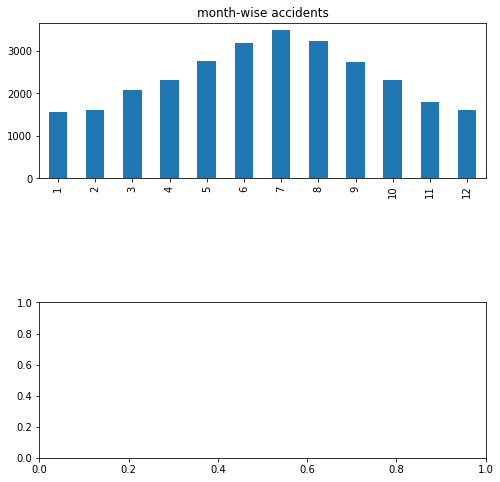

In [15]:
##plotting the bar chart
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8, 8))
fig.subplots_adjust(hspace=0.8)
total_month = train['month'].value_counts()
print(total_month)
train['month'].value_counts().sort_index().plot(ax=axes[0], kind='bar', title='month-wise accidents')


In [16]:
train.Make

0                         Cessna
1                         Cessna
2        CZECH SPORT AIRCRAFT AS
3                          Piper
4                          Beech
6                         Zenair
8                         Cessna
9                        Lancair
10                        Cessna
12                        Cessna
13                        Cessna
14                        Cessna
15                        Cessna
16                        Cessna
18                        Cirrus
19                         Piper
20                          BELL
22                         Piper
23                        Cessna
24                       Pilatus
25                   Air Tractor
26                         Piper
27             Darren M. Vinelli
28                        CESSNA
30                        Mooney
31                         Beech
33                        Cessna
34                        Cirrus
35                      Champion
36                        Cessna
          

AS you can observe after seeing these values the characters are not uniform with uppercase and lowercase letters.
Hence,we need to get them into lower cases/upper casses and get rid of white spaces between them.

In [17]:
train['cleaned.make'] = train['Make'].map(lambda x: "{}".format(x).lower().strip())
#strip() fucntion will remove the white spaces.

# Data Visualization

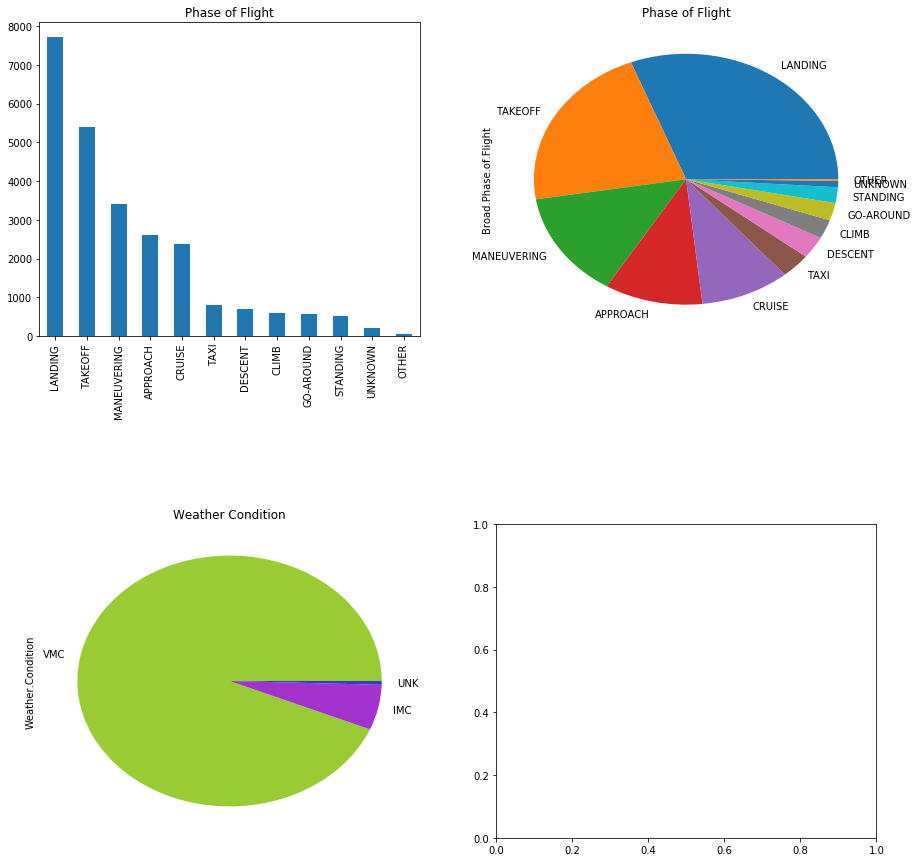

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 15))
fig.subplots_adjust(hspace=0.6)
colors = ['#99cc33', '#a333cc', '#333dcc']
train['Broad.Phase.of.Flight'].value_counts().plot(ax=axes[0,0], kind='bar', title='Phase of Flight')
train['Weather.Condition'].value_counts().plot(ax=axes[1,0], kind='pie', colors=colors, title='Weather Condition')
train['Broad.Phase.of.Flight'].value_counts().plot(ax=axes[0,1], kind='pie', title='Phase of Flight')
##go through the code step by step to understand the concept of presenatation


# You will need to import Basemap on your system to use the further code

In [ ]:

from bokeh.io import show
from bokeh.sampledata import us_states
from bokeh.plotting import figure
##intalling basemap
!conda install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.7
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/swapnilgharat/anaconda3

  added / updated specs: 
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.0              |   py36h0acbc05_0        15.1 MB
    geos-3.6.2                 |       h5470d99_2         1.4 MB
    matplotlib-2.1.2           |   py36h6d6146d_0         6.7 MB
    openssl-1.0.2s             |       h1de35cc_0         3.0 MB
    ca-certificates-2019.5.15  |                0         133 KB
    blas-1.0                   |              mkl           5 KB
    certifi-2019.3.9           |           py36_0         155 KB
    pyproj-1.9.6               |   py36h9c430a6_0          66 KB
    proj4-5.2.0      

In [ ]:
y

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
north, south, east, west = 71.39, 24.52, -66.95, 172.5
#m = Basemap(
#    projection='lcc',
#    llcrnrlat=south,
#    urcrnrlat=north,
#    llcrnrlon=west,
#    urcrnrlon=east,
#    lat_1=33,
#    lat_2=45,
#    lon_0=-95,
#    resolution='l')
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.0,urcrnrlon=-2.566,urcrnrlat=46.352,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.0,projection='lcc',
            lat_1=50.0,lon_0=-107.0,ax=ax)
x, y = m(train['Longitude'].values, train['Latitude'].values)
m.drawcoastlines()
m.drawcountries()
m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd)

# Using Kmeans-Clustering

In [ ]:
latlon = train[['Longitude', 'Latitude']]
latlon.head()


In [ ]:
kmeans = KMeans(n_clusters=50)
kmodel = kmeans.fit(latlon)
centroids = kmodel.cluster_centers_

In [ ]:
centroids
lons, lats = zip(*centroids)
print(lats)
print(lons)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
north, south, east, west = 71.39, 24.52, -66.95, 172.5
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.0,urcrnrlon=-2.566,urcrnrlat=46.352,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.0,projection='lcc',
            lat_1=50.0,lon_0=-107.0,ax=ax)
x, y = m(train['Longitude'].values, train['Latitude'].values)
m.drawcoastlines()
m.drawcountries()
m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd)
cx, cy = m(lons, lats)
m.scatter(cx, cy, 3, color='g')

Let's riff on this map a bit more (still going to be population-centric, but there's some interesting stuff happening in Alaska)

In [ ]:
from bokeh.sampledata import us_states
us_states = us_states.data.copy()
state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]
p = figure(title="Aviation Incidents and Centroids", 
           toolbar_location="left", plot_width=1100, plot_height=700)
p.patches(state_xs, state_ys, fill_alpha=0.0,
    line_color="#884444", line_width=1.5)
p.circle(train['Longitude'].data, train['Latitude'].data, size=8, color='navy', alpha=1)
p.circle(lons, lats, size=8, color='navy', alpha=1)
show(p)